In [1]:
!pip show lime

In [2]:
!pip install lime


     -------------------------------------- 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.1/8.1 MB 14.3 MB/s eta 0:00:00
     --------------------------------------- 12.8/12.8 MB 26.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 49.5 MB/s eta 0:00:00
     ------------------------------------- 315.8/315.8 kB 19.1 MB/s eta 0:00:00
     ------------------------------------- 226.5/226.5 kB 14.4 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 47.9 MB/s eta 0:00:00
     ---------------------------------------- 221.2/221.2 kB ? eta 0:00:00
  Created wheel for lime: f


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
!{sys.executable} -m pip install lime


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283918 sha256=82d04ec18c0601b040a10f535efc47c85cd5a0b89711dbbc04ac866d1542800e
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\7c\04\5c\157dc9106512a6c7a30653ec064490c94a49e0fc8f63d19ab9
Successfully built lime


  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [8]:
import lime
import lime.lime_tabular
import xgboost

print("✅ LIME and XGBoost are ready.")


✅ LIME and XGBoost are ready.


In [9]:
# Step 1: Load Data, Model, and Initialize LIME
import lime
import lime.lime_tabular
import pandas as pd
import joblib
import xgboost as xgb
import numpy as np

# ✅ Load test data
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()

# ✅ Load trained XGBoost model
model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model_weighted.pkl")

# ✅ Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    mode='classification',
    feature_names=X_test.columns.tolist(),
    class_names=[str(i) for i in sorted(y_test.unique())],
    discretize_continuous=True
)

print("✅ LIME Explainer and model ready.")


✅ LIME Explainer and model ready.


C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

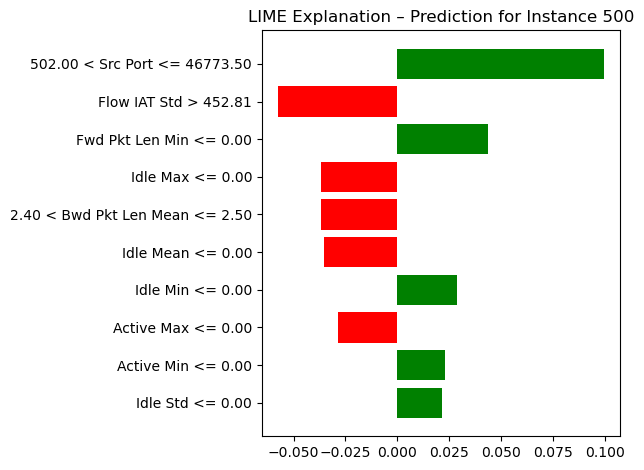

In [10]:
# Step 2a: Generate LIME Explanation for a Specific Instance (Replay Attack)
import matplotlib.pyplot as plt

# 🔢 Choose the instance to explain (row index from test set)
instance_index = 500  # You can change this if needed (this is for Replay Attack)

# 🧪 Get the instance
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# ✅ Explain prediction
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=model.predict_proba,
    num_features=10  # Number of top features to show
)

# 📊 Show explanation
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation – Prediction for Instance {instance_index}")
plt.tight_layout()
plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

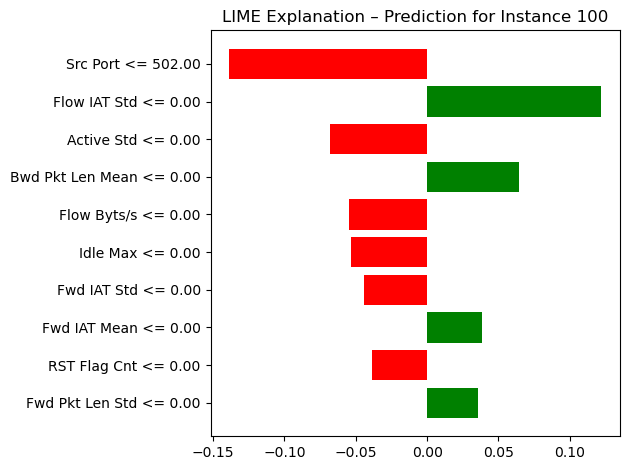

In [11]:
# Step 2b: Generate LIME Explanation for a Specific Instance (Command Injection 100)
import matplotlib.pyplot as plt

# 🔢 Choose the instance to explain (row index from test set)
instance_index = 100  # You can change this if needed (this is for Command Injection)

# 🧪 Get the instance
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# ✅ Explain prediction
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=model.predict_proba,
    num_features=10  # Number of top features to show
)

# 📊 Show explanation
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation – Prediction for Instance {instance_index}")
plt.tight_layout()
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Administrator\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

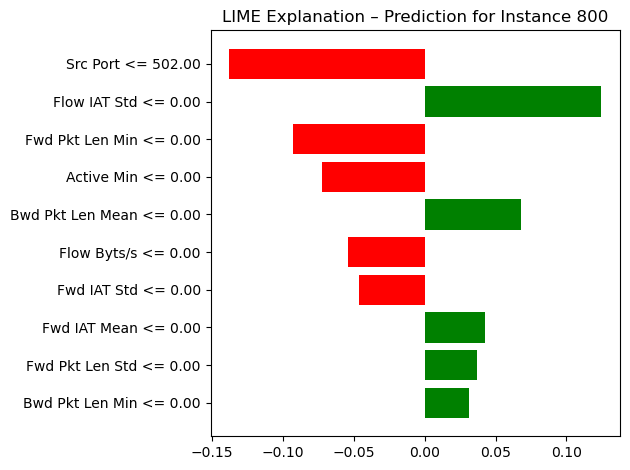

In [12]:
# Step 2c: Generate LIME Explanation for a Specific Instance ( Benign 800)
import matplotlib.pyplot as plt

# 🔢 Choose the instance to explain (row index from test set)
instance_index = 800  # You can change this if needed (this is for Benign 800)

# 🧪 Get the instance
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# ✅ Explain prediction
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=model.predict_proba,
    num_features=10  # Number of top features to show
)

# 📊 Show explanation
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation – Prediction for Instance {instance_index}")
plt.tight_layout()
plt.show()